In [1]:
from PIL import Image
import numpy as np
import os
import pickle
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import re
from scipy.spatial.distance import cdist

In [4]:
# set the target size for resizing
target_size = 224

# (Done) Exploration with resizing images

In [2]:
synthia_image_path = "D:\zsh\graduation\graduation_dataset\RAND_CITYSCAPES\RGB"
label_path = "D:\zsh\graduation\graduation_dataset\RAND_CITYSCAPES\GT\COLOR"

In [ ]:
image = Image.open(synthia_image_path+"\\"+'0000000.png')
label = Image.open(label_path+"\\"+'0000000.png')

In [ ]:
print(label)

In [ ]:
label_arr = np.array(label)

In [ ]:
label_arr.shape

In [ ]:
# example image
new_image = image.resize((256, 256))
new_image.save('image_256.jpg')

new_label = label.resize((256, 256))
new_label = new_label.convert('RGB')
new_label.save('label_256.jpg')

print(image.size) # Output: (1920, 1280)
print(new_image.size) # Output: (400, 400)

# (Done) A function that resize the images and put it to a new folder

In [9]:
synthia_image_path = "D:\zsh\graduation\graduation_dataset\RAND_CITYSCAPES\RGB"
label_path = "D:\zsh\graduation\graduation_dataset\RAND_CITYSCAPES\GT\COLOR"

resize_image_path = "D:\zsh\graduation\Graduation-project-domain-shift-image-2-image\dataset\SYNTHIA_{}\image".format(target_size)
resize_label_path = "D:\zsh\graduation\Graduation-project-domain-shift-image-2-image\dataset\SYNTHIA_{}\label-rgb".format(target_size)

In [12]:
def resize_images(source_folder,target_folder):
    count= 0
    for filename in os.listdir(source_folder):
#         if count>10:
#             break
        f = os.path.join(source_folder, filename)
        image = Image.open(f)
        if image.format == "RGBA":
            image = image.convert('RGB')
            
        new_image = image.resize((target_size, target_size))
        new_image.save(os.path.join(target_folder, filename))
        count = count+1

In [13]:
resize_images(synthia_image_path,resize_image_path)

In [14]:
resize_images(label_path,resize_label_path)

# Load image and labels

In [8]:
resize_image_path_synthia = "D:\zsh\graduation\Graduation-project-domain-shift-image-2-image\dataset\SYNTHIA_256\image"
resize_label_path_synthia = "D:\zsh\graduation\Graduation-project-domain-shift-image-2-image\dataset\SYNTHIA_256\label-rgb"

cityscapes_path = "D:\zsh\graduation\Graduation-project-domain-shift-image-2-image\dataset\original_cityscapes_inputs"

In [9]:
# get relative path for both datasets, because global path is not allowed ("Not allowed to load local resource")
start = "D:\zsh\graduation\Graduation-project-domain-shift-image-2-image"
relative_path_cityscapes = os.path.relpath(cityscapes_path, start)
relative_path_synthia = os.path.relpath(resize_image_path_synthia, start)

TODO:

1. The random choice is with replacement, need to be without
2. Also set seed

In [3]:
# labels of cityscapes
pickle_file = os.path.join("D:\zsh\graduation\Graduation-project-domain-shift-image-2-image\dataset\\5_classes_preprocessed", "validation_label_classes.pkl")
with open(pickle_file, 'rb') as f:
    Y_test = pickle.load(f)
    
cityscapes_labels = np.array(Y_test)

In [5]:
cityscapes_labels.shape

(500, 256, 256)

In [13]:
# Cityscapes
# import the pickle 
cityscapes_100 = []
cityscapes_path_100 = []
cityscapes_labels_100= []

cityscapes_names= os.listdir(cityscapes_path)
cityscapes_names_100 = random.choices(cityscapes_names, k=100)
for name in cityscapes_names_100:
    image = Image.open(cityscapes_path+"\\"+name).convert("RGB")
    cityscapes_100.append(np.array(image))
    cityscapes_path_100.append(relative_path_cityscapes+"\\"+name)
    ind = int(name.split('.')[0])
    label = cityscapes_labels[ind]
    cityscapes_labels_100.append(label)

cityscapes_100 = np.array(cityscapes_100)
cityscapes_path_100 = np.array(cityscapes_path_100)
cityscapes_labels_100= np.array(cityscapes_labels_100)

# pickle_file = "D:\zsh\graduation\graduation_dataset\\5_classes_preprocessed\\validation_images.pkl"
# with open(pickle_file, 'rb') as f:
#     cityscapes_images = pickle.load(f)
# # randomly select images 100 out of the 500
# cityscapes_100 = random.choices(cityscapes_images, k=100)
# cityscapes_100 = np.array(cityscapes_100)

In [14]:
cityscapes_labels_100.shape
# (100, 256, 256)

(100, 256, 256)

In [15]:
# synthia

synthia_100 = []
synthia_path_100 =[]
synthia_label_100_initial = []

synthia_names = os.listdir(resize_image_path_synthia)
# randomly select 100 images to load in to numpy array
synthia_names_100 = random.choices(synthia_names, k=100)
for name in synthia_names_100:
#     print(name)
#     print(resize_image_path_synthia)
#     print(resize_image_path_synthia+"\\"+name)
    image = Image.open(resize_image_path_synthia+"\\"+name).convert("RGB")
    
    synthia_100.append(np.array(image))
    synthia_path_100.append(relative_path_synthia+"\\"+name)
    label = Image.open(resize_label_path_synthia+"\\"+name).convert("RGB")
    synthia_label_100_initial.append(np.array(label))

synthia_100 = np.array(synthia_100)
synthia_path_100 = np.array(synthia_path_100)
synthia_label_100_initial = np.array(synthia_label_100_initial)


In [ ]:
synthia_label_100_initial.shape

# Synthia: 

# Synthia: Transform label images to classes

In [17]:
synthia_colors = [[  0,   0,   0], # void
         [70,130, 180], # sky
         [70,70,70], # building
        [128, 64, 128], # road
        [244, 35, 232], # sidewalk
         [64,64,128], # fense
         [107,142,35], # vegetation	
        [153, 153, 153], # pole
        [0, 0, 142], # car
        [220, 220, 0],  # traffic sign
        [220, 20, 60], # pedestrian
        [119, 11, 32], # bicycle
        [0, 0, 230], # motorcycle
        [250,170,160], # parking-slot
        [128,64,64], # road-work
        [250,170,30], # traffic light
        [152, 251, 152], # terrain
        [255, 0, 0], # rider
        [0, 0, 70], # truck
        [0, 60, 100], # bus
        [0, 80, 100], # train
        [102, 102, 156]# wall, lanemarking
    ]


category_map = {
    0: 0,
    1: 4,
    2: 0,
    3: 1,
    4: 2,
    5: 0,
    6: 3,
    7: 0,
    8: 5,
    9: 0,
    10: 0,
    11: 0,
    12: 0,
    13: 0,
    14: 0,
    15: 0,
    16: 0,
    17: 0,
    18: 0,
    19: 0,
    20: 0,
    21: 0}

In [16]:
len(synthia_colors)

22

In [18]:
# color to class
def color_to_class(label):
    # create new empty mask
    mask = np.zeros(shape=(label.shape[0], label.shape[1]), dtype = np.int32)
    # iterate through two dimensions
    for row in range(label.shape[0]):
        for col in range(label.shape[1]):
            a = label[row, col, :]
            # distance between this pixel and the original pixel
            d = cdist(np.array([a]),np.array(synthia_colors))
            idx = np.argmin(d)
            new_idx = category_map[idx]
            mask[row, col] = new_idx
    mask = np.reshape(mask, (mask.shape[0], mask.shape[1]))
    return mask

In [19]:
def transform_masks_synthia(labels):
    masks = []
    for label in labels:
        mask = color_to_class(label)
        masks.append(mask)
    masks = np.array(masks)

    return masks

Transform all images (for size 224\*224 specifically)

In [21]:
resize_image_path_synthia_224= "D:\zsh\graduation\Graduation-project-domain-shift-image-2-image\dataset\SYNTHIA_224\image"
resize_label_path_synthia_224 = "D:\zsh\graduation\Graduation-project-domain-shift-image-2-image\dataset\SYNTHIA_224\label-rgb"

In [22]:
synthia_names = os.listdir(resize_image_path_synthia_224)

In [26]:
synthia_initial_labels=[]

for name in synthia_names:
    label = Image.open(resize_label_path_synthia_224+"\\"+name).convert("RGB")
    synthia_initial_labels.append(np.array(label))

In [27]:
len(synthia_initial_labels)

9400

In [28]:
synthia_label_classes = transform_masks_synthia(synthia_initial_labels)
# this ranned forever and didn't work, got to try something else

KeyboardInterrupt: 

In [ ]:
import pickle

a = {'hello': 'world'}

with open('filename.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(a == b)

# transform the 100 images

In [30]:
synthia_label_100_classes = transform_masks_synthia(synthia_label_100_initial)

In [38]:
synthia_label_100_classes.shape

(100, 256, 256)

In [32]:
# class to color: useful for displaying the similar images later
colors = [[  0,   0,   0],
          [128, 64, 128],# road
          [244, 35, 232], # sidewalk
          [107, 142, 35],# vegetation
          [70, 130, 180], # sky
          [0, 0, 142], # car
         ]

In [33]:
def class_to_color(labels):
    label_colors = np.zeros((256,256,3))
    
    for i,row in enumerate(labels):
        for j,pixel in enumerate(row):
            label_colors[i,j] = colors[pixel]
    
    return label_colors

In [55]:
# find the cityscapes images with mimimal distance to citiscapes images
def most_similar_mask(instance, data):
#     nodes = np.asarray(nodes)
    # Euclidean distance calculation
    iou_list = []
    for new_instance in data:
        intersection = np.logical_and(instance, new_instance)
        union = np.logical_or(instance, new_instance)
        iou_score = np.sum(intersection) / np.sum(union)
        iou_list.append(iou_score)
    iou_arr = np.array(iou_list)
#     dist_2 = np.sum((data - instance)**2, axis=1)
    return np.argmax(iou_arr)

In [58]:
cityscapes_similar_100_names = []
cityscapes_similar_100_paths = []
for label in cityscapes_labels_100:
    image_index_synthia = most_similar_mask(label,synthia_label_100_classes)
#     print(label.shape)
#     print(synthia_label_100_classes.shape)
#     print(image_index_synthia)
    name = synthia_names_100[image_index_synthia]
    path = synthia_path_100[image_index_synthia]
    cityscapes_similar_100_names.append(name)
    cityscapes_similar_100_paths.append(path)

In [59]:
synthia_similar_100_names = []
synthia_similar_100_paths = []
for label in synthia_label_100_classes:
    image_index_cityscapes = most_similar_mask(label,cityscapes_labels_100)
    name = cityscapes_names_100[image_index_cityscapes]
    path = cityscapes_path_100[image_index_cityscapes]
    synthia_similar_100_names.append(name)
    synthia_similar_100_paths.append(path)

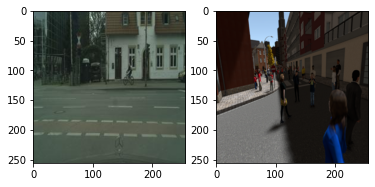

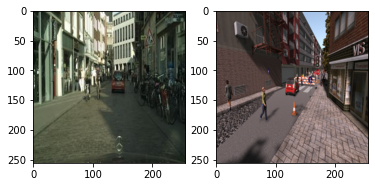

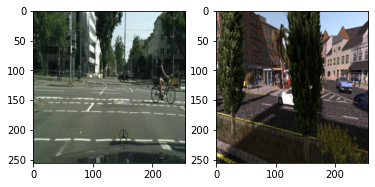

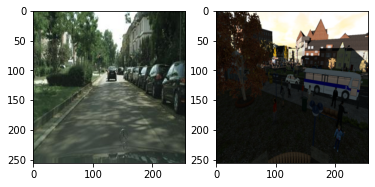

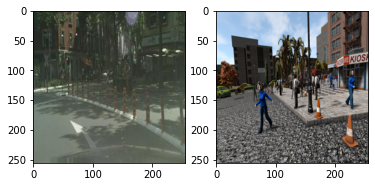

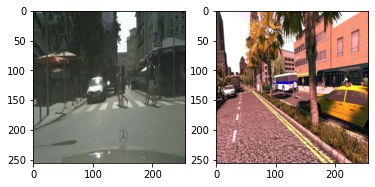

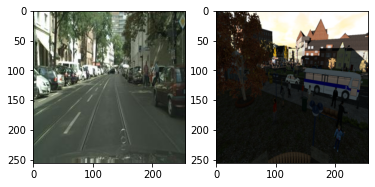

In [69]:
for i,cityscapes_image in enumerate(cityscapes_100):
    synthia_image_name = cityscapes_similar_100_names[i]
    synthia_image = Image.open(resize_image_path_synthia+"\\"+synthia_image_name).convert("RGB")
    synthia_image = np.array(synthia_image)
#     plt.subplots(1,2)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(cityscapes_image)
    ax2.imshow(synthia_image)
    if i>5: 
        break

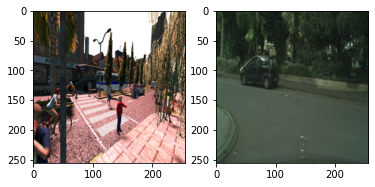

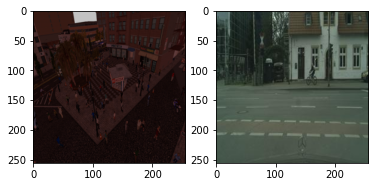

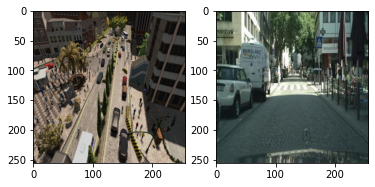

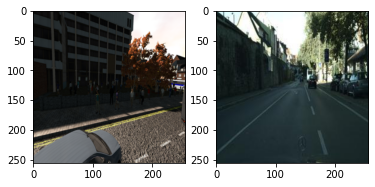

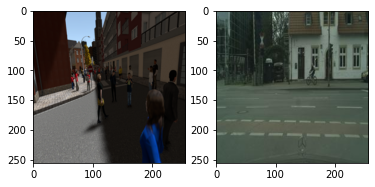

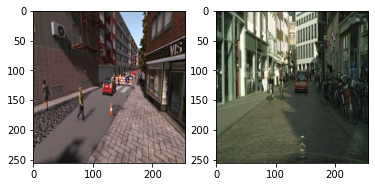

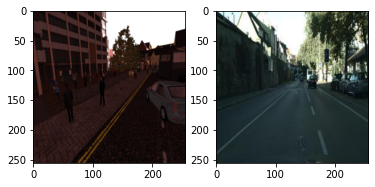

In [66]:
for i,synthia_image in enumerate(synthia_100):
    cityscapes_image_name = synthia_similar_100_names[i]
    cityscapes_image = Image.open(cityscapes_path+"\\"+cityscapes_image_name).convert("RGB")
    cityscapes_image = np.array(cityscapes_image)
#     plt.subplots(1,2)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(synthia_image)
    ax2.imshow(cityscapes_image)
    if i>5: 
        break


In [ ]:
synthia_label_100_classes
cityscapes_label_100

In [76]:
print(synthia_names_100[:5])

['0002277.png', '0003249.png', '0006638.png', '0008189.png', '0004713.png']


# Work until here

In [78]:
type(synthia_names_100)

list

In [80]:
for i,cityscapes_image in enumerate(cityscapes_100):
    synthia_image_name = cityscapes_similar_100_names[i]
    label_index = np.where(np.array(synthia_names_100)==synthia_image_name)[0]
    print(label_index)
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     ax1.imshow(cityscapes_image)
#     ax2.imshow(synthia_image)
    if i>5: 
        break

[4]
[5]
[38]
[ 7 37]
[15]
[66]
[ 7 37]


# Embedding for the input （pca and tsne）

In [11]:
# concatenate the images and the paths from two different dataset
combined_embedding = np.concatenate((cityscapes_100,synthia_100),axis=0)
combined_embedding = np.reshape(combined_embedding,(len(combined_embedding), 256*256*3))

combined_paths = np.concatenate((cityscapes_path_100,synthia_path_100),axis=0)


In [12]:
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(combined_embedding)
# print(pca.explained_variance_ratio_)

df_pca = pd.DataFrame(pca_embedding,columns=["pca_1","pca_2"])

In [13]:
pca_50 = PCA(n_components=50)
pca_embedding = pca_50.fit_transform(combined_embedding)
print(np.sum(pca_50.explained_variance_ratio_))
tsne = TSNE()
tsne_embedding = tsne.fit_transform(pca_embedding)

df_tsne = pd.DataFrame(tsne_embedding,columns=["tsne_1","tsne_2"])
df_tsne.head()

0.8131132804074082


,tsne_1,tsne_2
0,5.229450,-0.769197
1,4.839324,6.143002
2,-1.167728,2.058329
3,2.836457,-7.799661
4,-3.016243,2.729397


Then generate embedding (PCA, t-SNE(initialized with PCA))

the columns of result df ["pca_1","pca_2","tsne_1","tsne_2"]

In [46]:
df = pd.concat([df_pca, df_tsne], axis=1)
df["dataset"] =np.nan
df["path"] = combined_paths

In [47]:
df["dataset"].iloc[:100] = "Cityscapes"
df["dataset"].iloc[100:] = "Synthia"

C:\Users\Alex\AppData\Local\Temp\ipykernel_11340\835237747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dataset"].iloc[:100] = "Cityscapes"


Find the list of most similar images from the other dataset

1. cityscapes_similar_100: where each item is a path to the most similar images in synthia dataset of the current cityscapes image
2. synthia_similar_100: vice versa

When the closest point is not calculated based on embedding, this should be moved forward

In [48]:
df_cityscapes = df.iloc[:100,:]
df_synthia = df.iloc[100:,:]

In [49]:
# transform the columns to numpy array
# if use tsne instead of pca, TODO: change this code
cityscapes_embedding = df_cityscapes[["pca_1","pca_2"]].to_numpy()
synthia_embedding = df_synthia[["pca_1","pca_2"]].to_numpy()

In [37]:
# function to find the corresponding point with minimal euclidean distance
# this should work for more than 2d points as well
def most_similar_image(instance, data):
#     nodes = np.asarray(nodes)
    # Euclidean distance calculation
    dist_2 = np.sum((data - instance)**2, axis=1)
    return np.argmin(dist_2)

In [38]:
# find the most similar image in the other dataset for each image
# and make the image paths to be a list
cityscapes_similar_100 = []
for instance in cityscapes_embedding:
    image_index_synthia = most_similar_image(instance,synthia_embedding)
    path = synthia_path_100[image_index_synthia]
    cityscapes_similar_100.append(path)

synthia_similar_100 = []
for instance in synthia_embedding:
    image_index_cityscapes = most_similar_image(instance,cityscapes_embedding)
    path = cityscapes_path_100[image_index_cityscapes]
    synthia_similar_100.append(path)

In [39]:
# add the image paths to be a separate columns
df_cityscapes.loc[:,"similar_image_path"] = np.array(cityscapes_similar_100)
df_synthia.loc[:,"similar_image_path"] = np.array(synthia_similar_100)

# combines the two dfs back to one
df = pd.concat([df_cityscapes, df_synthia], axis=0)

C:\Users\Alex\AppData\Local\Temp\ipykernel_11340\3422265885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cityscapes.loc[:,"similar_image_path"] = np.array(cityscapes_similar_100)
C:\Users\Alex\AppData\Local\Temp\ipykernel_11340\3422265885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_synthia.loc[:,"similar_image_path"] = np.array(synthia_similar_100)


df.iloc[155,:]

Generate example graph

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="dataset", # see if this need to be changed
    palette=sns.color_palette("hls", 2), # palette corresponds to hue
    data=df # df_tsne_1 or df_tsne_2
)

In [42]:
# save
df.to_csv("input_df_v4.csv",index=False)

# Regenerate distance based on mask？

In [ ]:
# read the label in
# calculate distance

# Subset: transform the label to class number, and save？